# Model Reproducibility

### **Task 2:**

* Read the scientific publication and identify a result you could reproduce from the paper. Hint: explain in your GitHub issue for which dataset are you going to reproduce the results given in the publicatioon.

* Try to implement the model as described by the authors (not from the Ersilia Model Hub) and reproduce the results selected from the paper. Make sure to include the results evaluation in your repositoiy.

* Check that the model provides the same results when running via the Ersilia Model Hub.

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.

In [184]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('../src')
from smiles_processing import standardise_smiles
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [185]:
# In this codeblock I will load the predictions obtained from the original author's code implementation from the /data folder

# Here I have selected Table6 where author have taken 1,824 FDA approved small molecule drugs from DrugBank database.
# Out of 1,824 approved small molecule drugs, deephERG predicted that 539 drugs (29.6%) might have hERG inhibitory effects
# i.e 539 drugs could block hERG.

df = pd.read_excel('../data/Table S6.xlsx')
df

,"Table S6. Detailed predictions for 1,824 approved drugs by deephERG",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
1,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
2,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
3,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
4,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
...,...,...,...,...,...,...
1820,DB00091,OC1=NC(CC)C(=O)N(CC(=O)N(C)C(CC(C)C)C(O)=NC(C(...,Cyclosporine,0.065335,0.934665,1
1821,DB00050,Clc1ccc(cc1)C[C@@H](NC(=O)[C@H](NC(=O)C)Cc1cc2...,Cetrorelix,0.0,1,1
1822,DB00035,S1SCCC(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@@H](Cc...,Desmopressin,0.205416,0.794584,1
1823,DB00014,Oc1ccc(cc1)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC...,Goserelin,0.000056,0.999944,1


In [186]:
# Use the first row as column names
df.columns = df.iloc[0]

# Remove the first row (now used as column names)
df = df.drop(0)

# Reset the index to start from 0
df.reset_index(drop=True,inplace=True)

# Display the updated DataFrame
df.head()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0


In [187]:
df.columns

Index(['DrugBank ID', 'Smiles', 'Name', 'Predicted negative probability',
       'Predicted positive probability', 'Predicted classification'],
      dtype='object', name=0)

In [188]:
# Create a new DataFrame with only the Smiles column
input_week2_task2 = df[['Smiles']]

# Display 
input_week2_task2.head()

,Smiles
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...
1,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...
2,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...
3,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1
4,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...


In [189]:
input_week2_task2.describe()

,Smiles
count,1824
unique,1820
top,O([C@]([C@@H](CN(C)C)C)(Cc1ccccc1)c1ccccc1)C(=...
freq,2


In [190]:
# Here we standardise smiles and check if any null values in standardised smilies list

smiles_list = input_week2_task2['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)

# Assigning standardised smiles to the DataFrame using .loc
input_week2_task2.loc[:, 'standardised_smiles'] = standardised_smiles_list

# Checking for NaN values in standardised_smiles_list
nan_indices = np.where(pd.isnull(standardised_smiles_list))[0]

if len(nan_indices) > 0:
    print("NaN values detected at indices:", nan_indices)
else:
    print("No NaN values detected in standardised_smiles_list.")


[19:45:39] Can't kekulize mol.  Unkekulized atoms: 3 10
[01/04/24 19:45:40 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[19:45:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 7 9
[19:45:53] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 8 10


NaN values detected at indices: [   9   13   14   25   29   30   31   33   34   35   36   37   45   46
   57   59   60   64  108  110  114  115  120  121  132  133  135  136
  148  155  161  189  252  257  285  344  351  361  370  371  375  399
  459  461  466  521  523  524  527  528  531  534  585  592  648  651
  657  661  671  680  707  757  811  816  977  987  998 1001 1013 1030
 1035 1070 1148 1200 1301 1306 1332 1357 1367 1423 1429 1438 1439 1567
 1576 1612 1613 1624 1678 1736 1747 1793 1804 1808 1809 1816]


C:\Users\patha\AppData\Local\Temp\ipykernel_16224\1086448239.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
input_week2_task2

,Smiles,standardised_smiles
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
1,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
2,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
3,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
4,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...
...,...,...
1819,OC1=NC(CC)C(=O)N(CC(=O)N(C)C(CC(C)C)C(O)=NC(C(...,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...
1820,Clc1ccc(cc1)C[C@@H](NC(=O)[C@H](NC(=O)C)Cc1cc2...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
1821,S1SCCC(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@@H](Cc...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...
1822,Oc1ccc(cc1)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...


In [192]:
# Remove NaN values and duplicates from DataFrame
input_week2_task2.dropna(inplace=True)
input_week2_task2.drop_duplicates(inplace=True)

# Reset index after removing rows
input_week2_task2.reset_index(drop=True, inplace=True)

# Drop the 'Smiles' column
input_week2_task2 = input_week2_task2.drop(columns=['Smiles'])

# Rename the 'standardised_smiles' column to 'Smiles'
input_week2_task2.rename(columns={'standardised_smiles': 'smiles'}, inplace=True)

input_week2_task2

C:\Users\patha\AppData\Local\Temp\ipykernel_16224\4061214834.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\patha\AppData\Local\Temp\ipykernel_16224\4061214834.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,smiles
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...
...,...
1719,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...
1720,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
1721,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...
1722,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...


In [193]:
input_week2_task2.describe()

,smiles
count,1724
unique,1722
top,Cn1c(=O)c2[nH]cnc2n(C)c1=O
freq,2


In [194]:
# As still there is few smilies which are not unique so we check for whitespace or leading/trailing spaces in the 'smiles' column
input_week2_task2['smiles'] = input_week2_task2['smiles'].str.strip()

# Count the occurrence of each unique 'smiles' value after stripping whitespace
smiles_counts_stripped = input_week2_task2['smiles'].value_counts()

# Find duplicates that occur more than once after stripping whitespace
duplicates_stripped = smiles_counts_stripped[smiles_counts_stripped > 1]

# Print out the duplicates after stripping whitespace
print("Duplicate 'smiles' values after stripping whitespace:")
print(input_week2_task2[input_week2_task2['smiles'].isin(duplicates_stripped.index)])

# Drop duplicates again after stripping whitespace
input_week2_task2.drop_duplicates(inplace=True)

# Reset index after removing rows again
input_week2_task2.reset_index(drop=True, inplace=True)


Duplicate 'smiles' values after stripping whitespace:
0                                                smiles
469   C[C@]12CC[C@@H]3c4ccc(OS(=O)(=O)O)cc4CC[C@H]3[...
640                          Cn1c(=O)c2[nH]cnc2n(C)c1=O
1559  C[C@]12CC[C@@H]3c4ccc(OS(=O)(=O)O)cc4CC[C@H]3[...
1568                         Cn1c(=O)c2[nH]cnc2n(C)c1=O


In [195]:
input_week2_task2.describe()

,smiles
count,1722
unique,1722
top,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
freq,1


In [196]:
# Save the new DataFrame as a CSV file
path = '../data/input_week2_task2.csv'
input_week2_task2.to_csv(path, index=False)

##### I ran the model on the dataset `input_week2_task2.csv` using following commands and save the output in `output_week2_task2.csv`

```
ersilia -v fetch eos30gr 
ersilia serve eos30gr
ersilia -v api run -i input_week2_task2.csv -o output_week2_task2.csv

```


In [211]:
# In this codeblock I will load the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder

df_predicted = pd.read_csv('../data/output_week2_task2.csv')
df_predicted

,key,input,activity10
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040
...,...,...,...
1717,PMATZTZNYRCHOR-IMVLJIQESA-N,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343
1718,SBNPWPIBESPSIF-MHWMIDJBSA-N,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502
1719,NFLWUMRGJYTJIN-NXBWRCJVSA-N,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436
1720,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578


In [198]:
# Drop the 'key' column 
df_predicted.drop(columns='key', inplace=True)

# Rename columns in a DataFrame
df_predicted.rename(columns={'input':'Smiles', 'activity10':'Predicted positive probability'}, inplace=True)

# Display 
df_predicted.head()

,Smiles,Predicted positive probability
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040


In [199]:
# Merge 'DrugBank ID' and 'Name' columns from df into df_predicted
df_predicted = pd.merge(df_predicted, df[['DrugBank ID', 'Name']], left_index=True, right_index=True)
column_order = ['DrugBank ID','Name', 'Smiles','Predicted positive probability']
df_predicted = df_predicted[column_order]

# Display 
df_predicted

,DrugBank ID,Name,Smiles,Predicted positive probability
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040
...,...,...,...,...
1717,DB00219,Oxyphenonium,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343
1718,DB00218,Moxifloxacin,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502
1719,DB00217,Bethanidine,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436
1720,DB00216,Eletriptan,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578


In [200]:
df_predicted['Predicted negative probability'] = 1 - df_predicted['Predicted positive probability']
df_predicted.head()

,DrugBank ID,Name,Smiles,Predicted positive probability,Predicted negative probability
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960


In [201]:
# Create a new column 'Predicted classification' based on 'Predicted positive probability'
df_predicted['Predicted classification'] = (df_predicted['Predicted positive probability'] >= 0.5).astype(int)

# Display 
df_predicted

,DrugBank ID,Name,Smiles,Predicted positive probability,Predicted negative probability,Predicted classification
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406,0
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363,0
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515,0
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792,0
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960,0
...,...,...,...,...,...,...
1717,DB00219,Oxyphenonium,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343,0.617657,0
1718,DB00218,Moxifloxacin,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502,0.483498,1
1719,DB00217,Bethanidine,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436,0.518564,0
1720,DB00216,Eletriptan,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578,0.505422,0


In [202]:
# In this codeblock I will compare the orginal implementation vs the Ersilia Model Hub result

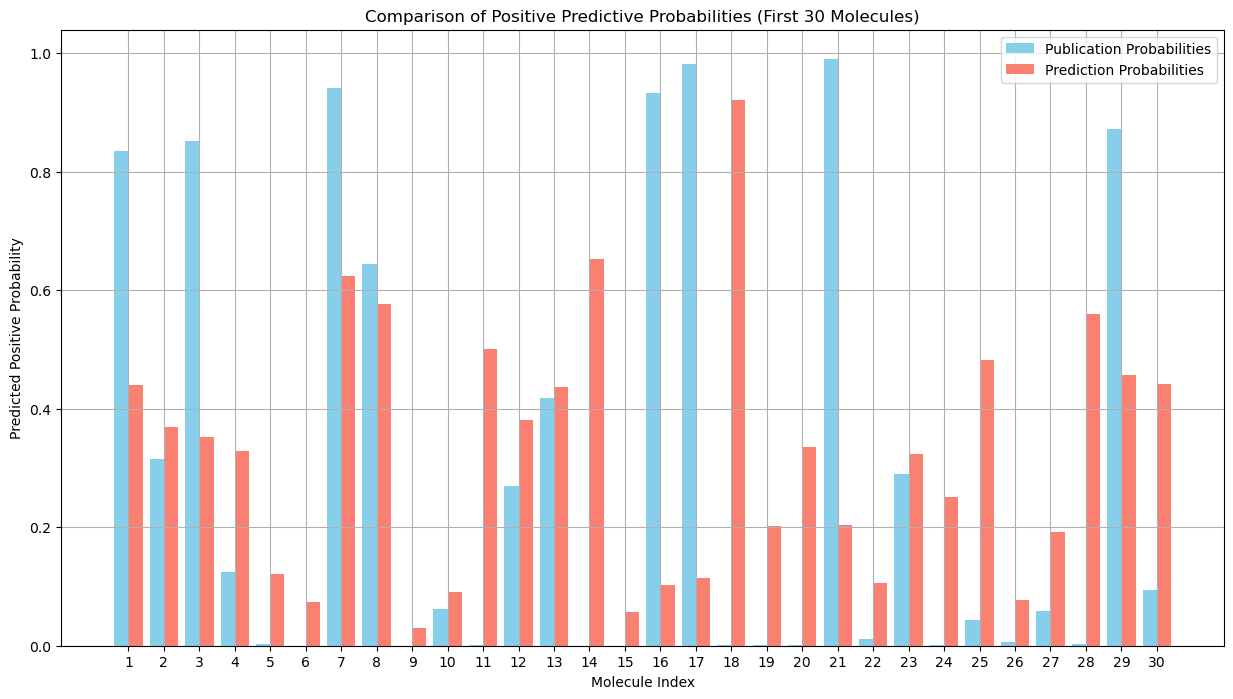

In [203]:
# Extracting the first 30 probabilities and corresponding molecule indices
publication_probabilities = df['Predicted positive probability'].head(30)
prediction_probabilities = df_predicted['Predicted positive probability'].head(30)
molecule_indices = range(1, 31)  

# Plotting
plt.figure(figsize=(15, 8))  

# Width of the bars
bar_width = 0.4 

# Position of bars on x-axis
bar_positions1 = [index - bar_width/2 for index in molecule_indices]
bar_positions2 = [index + bar_width/2 for index in molecule_indices]

# Plotting bars
plt.bar(bar_positions1, publication_probabilities, label='Publication Probabilities', color='skyblue', width=bar_width)
plt.bar(bar_positions2, prediction_probabilities, label='Prediction Probabilities', color='salmon', width=bar_width)

plt.title('Comparison of Positive Predictive Probabilities (First 30 Molecules)')
plt.xlabel('Molecule Index')
plt.ylabel('Predicted Positive Probability')
plt.xticks(molecule_indices)
plt.legend()
plt.grid(True);

#Save the plot in data directory
path = '../figures/01_model_reproducibility/BarChart_+vePredictiveProbability.png'
plt.savefig(path)

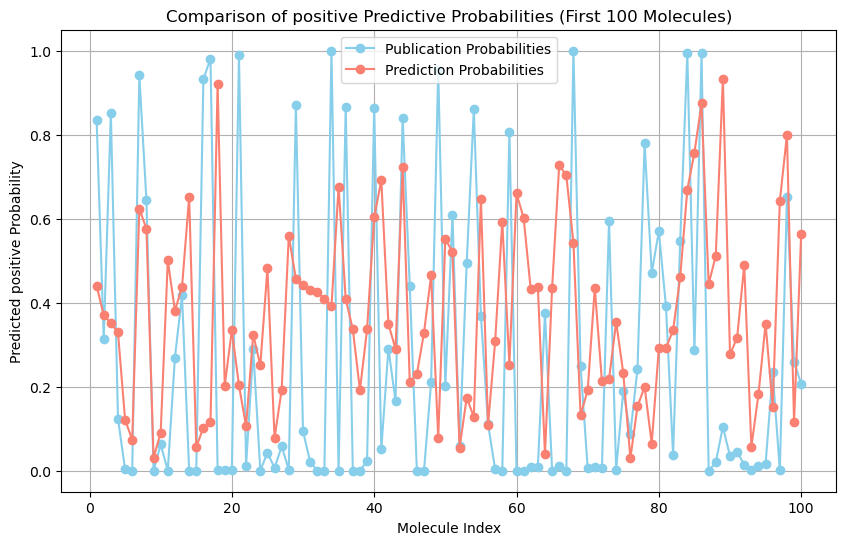

In [204]:
# Extracting the first 100 probabilities and corresponding molecule indices
publication_probabilities = df['Predicted positive probability'].head(100)
prediction_probabilities = df_predicted['Predicted positive probability'].head(100)
molecule_indices = range(1, 101)  

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(molecule_indices, publication_probabilities, label='Publication Probabilities', color='skyblue', marker='o')
plt.plot(molecule_indices, prediction_probabilities, label='Prediction Probabilities', color='salmon', marker='o')
plt.title('Comparison of positive Predictive Probabilities (First 100 Molecules)')
plt.xlabel('Molecule Index')
plt.ylabel('Predicted positive Probability')
plt.legend()
plt.grid(True);

#Save the plot in data directory
path = '../figures/01_model_reproducibility/LineChart_+vePredictiveProbability.png'
plt.savefig(path)

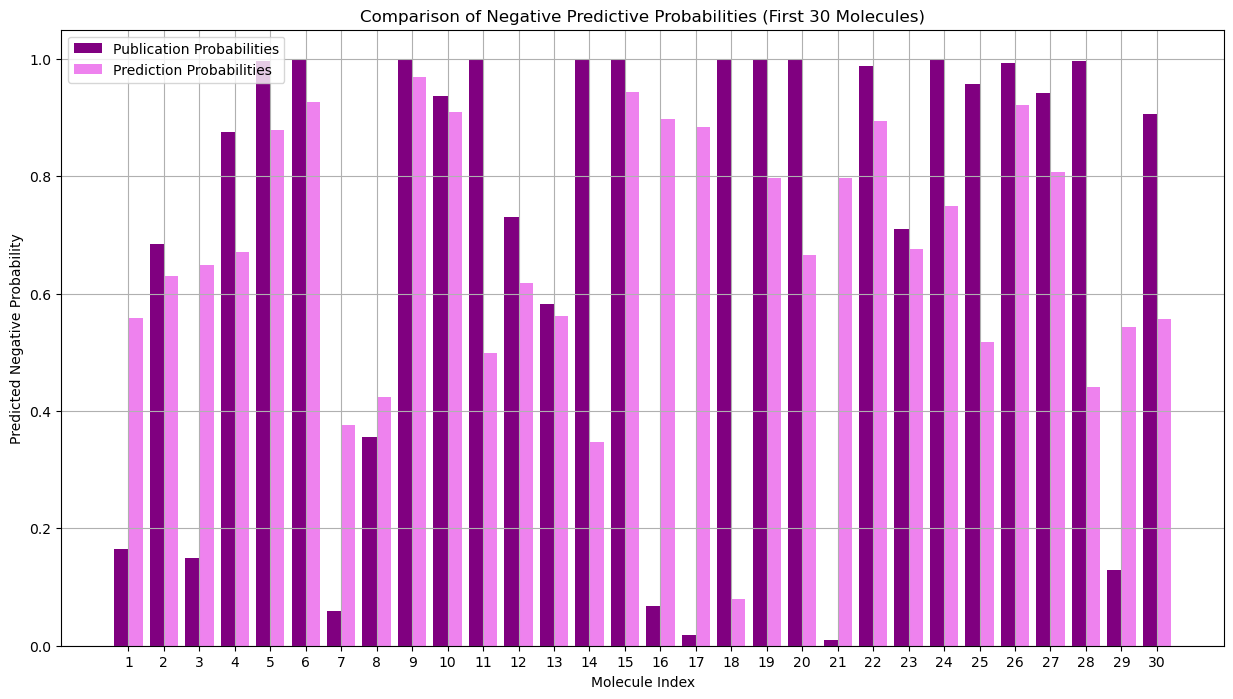

In [205]:
# Extracting the first 200 probabilities and corresponding molecule indices
publication_probabilities = df['Predicted negative probability'].head(30)
prediction_probabilities = df_predicted['Predicted negative probability'].head(30)
molecule_indices = range(1, 31) 

# Plotting
plt.figure(figsize=(15, 8))

# Width of the bars
bar_width = 0.4  

# Position of bars on x-axis
bar_positions1 = [index - bar_width/2 for index in molecule_indices]
bar_positions2 = [index + bar_width/2 for index in molecule_indices]

# Plotting bars
plt.bar(bar_positions1, publication_probabilities, label='Publication Probabilities', color='purple', width=bar_width)
plt.bar(bar_positions2, prediction_probabilities, label='Prediction Probabilities', color='violet', width=bar_width)

plt.title('Comparison of Negative Predictive Probabilities (First 30 Molecules)')
plt.xlabel('Molecule Index')
plt.xticks(molecule_indices)
plt.ylabel('Predicted Negative Probability')
plt.legend()
plt.grid(True);

#Save the plot in data directory
path = '../figures/01_model_reproducibility/BarChart_-vePredictiveProbability.png'
plt.savefig(path)

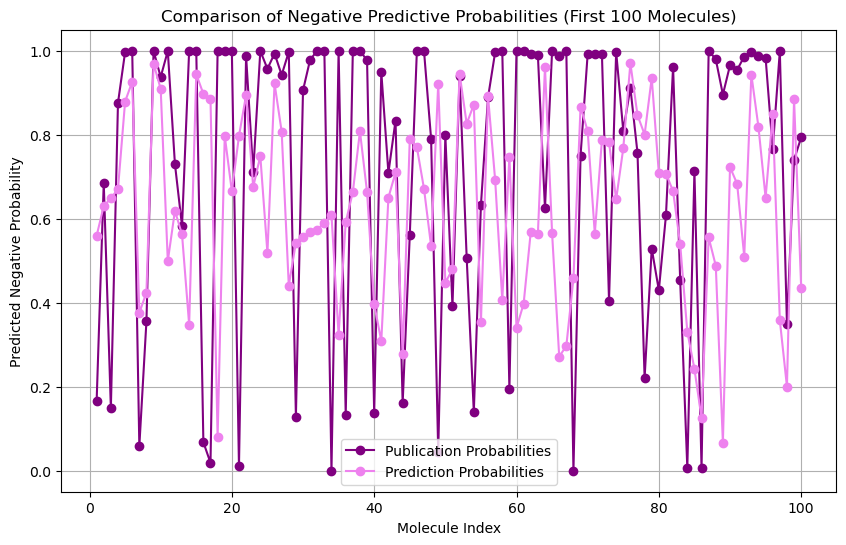

In [206]:
# Extracting the first 100 probabilities and corresponding molecule indices
publication_probabilities = df['Predicted negative probability'].head(100)
prediction_probabilities = df_predicted['Predicted negative probability'].head(100)
molecule_indices = range(1, 101) 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(molecule_indices, publication_probabilities, label='Publication Probabilities', color='purple', marker='o')
plt.plot(molecule_indices, prediction_probabilities, label='Prediction Probabilities', color='violet', marker='o')
plt.title('Comparison of Negative Predictive Probabilities (First 100 Molecules)')
plt.xlabel('Molecule Index')
plt.ylabel('Predicted Negative Probability')
plt.legend()
plt.grid(True);

#Save the plot in data directory
path = '../figures/01_model_reproducibility/LineChart_-vePredictiveProbability.png'
plt.savefig(path)

### Based on the above graphs, it's evident that there's a discrepancy between the results obtained from the publication and those from the Ersilia Model Hub. This inconsistency indicates that the model eos30gr is not reproducible.

In [207]:
df_predicted

,DrugBank ID,Name,Smiles,Predicted positive probability,Predicted negative probability,Predicted classification
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406,0
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363,0
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515,0
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792,0
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960,0
...,...,...,...,...,...,...
1717,DB00219,Oxyphenonium,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343,0.617657,0
1718,DB00218,Moxifloxacin,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502,0.483498,1
1719,DB00217,Bethanidine,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436,0.518564,0
1720,DB00216,Eletriptan,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578,0.505422,0


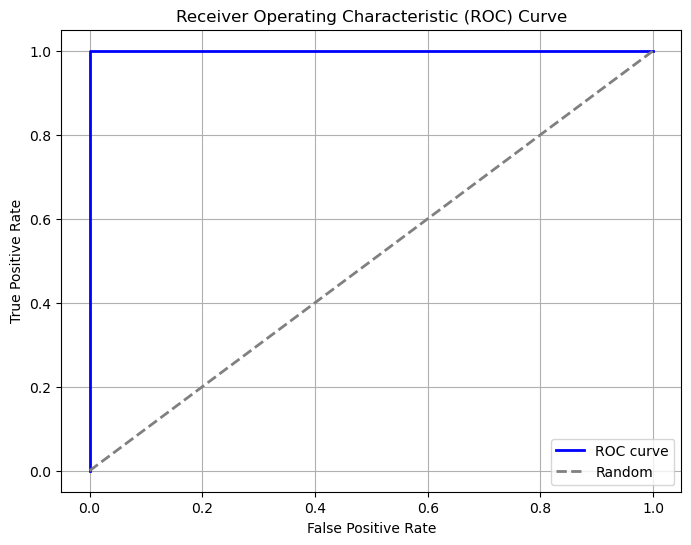

In [208]:
# In this codeblock I will recreate the figure or value I am to reproduce, for example an AUROC

y_true = df_predicted['Predicted classification'].astype(int)

y_pred_prob = df_predicted['Predicted positive probability']

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True);

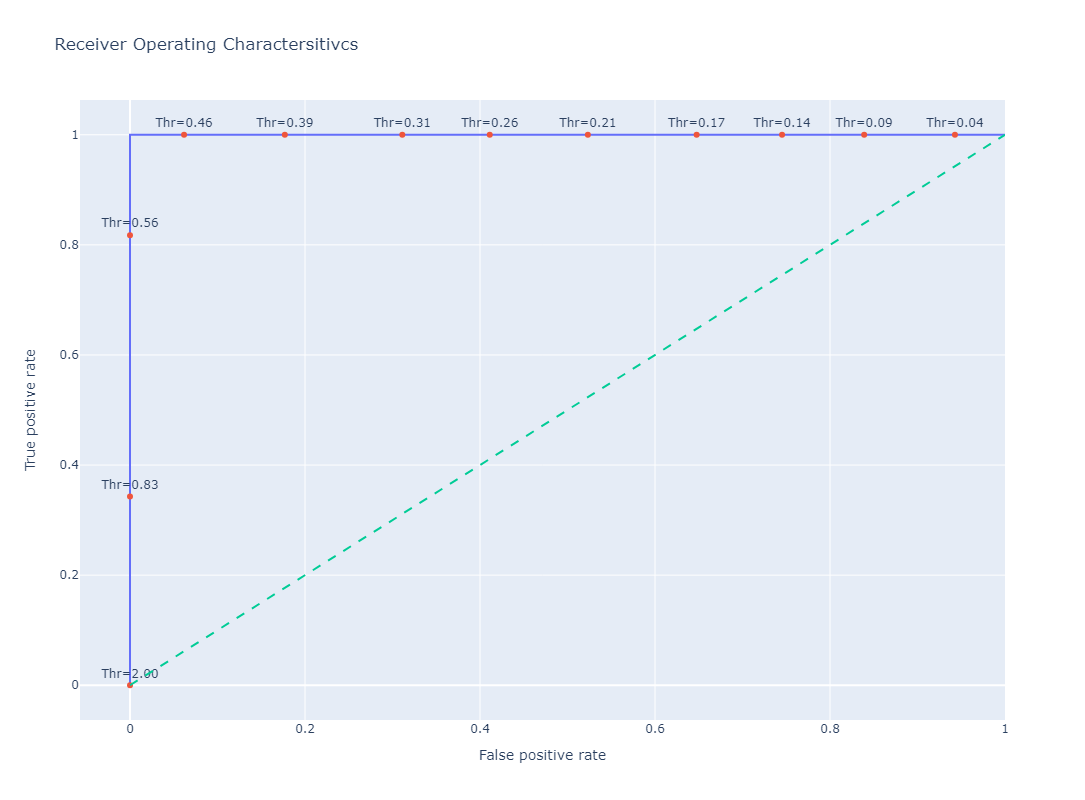

In [209]:
import plotly.graph_objects as go

# generate a trace for roc curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

#only label every nth point to avoid cluttering
n=40
indices = np.arange(len(thresholds))%n==0 #choose index where n is zero

trace1=go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# diagonal line
trace2=go.Scatter(
    x=[0,1],
    y=[0,1],
    mode='lines',
    name='Random (Area=0.5)',
    line=dict(dash='dash')
)
data=[trace0,trace1,trace2]

#Define layout with square aspect ratio
layout=go.Layout(
    title='Receiver Operating Charactersitivcs',
    xaxis=dict(title='False positive rate'),
    yaxis=dict(title='True positive rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)
# define the figure and add data
fig=go.Figure(data=data,layout=layout)
fig.show()

In [210]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assigning true labels to y_true
y_true = df['Predicted classification']

# Assigning predicted probabilities to y_pred_prob
y_pred_prob = df['Predicted positive probability']  # or 'Predicted negative probability'

# Thresholding the predicted probabilities to obtain binary predictions
y_pred = (y_pred_prob >= 0.5).astype(int)  # or any other threshold you prefer

# Compute confusion matrix using y_pred instead of y_pred_prob
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [ ]:
df_predicted.columns